In [4]:
import pandas as pd

df = pd.read_csv('./datasets/ThoraricSurgery.csv', header=None)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,293,1,3.80,2.80,0,0,0,0,0,0,12,0,0,0,1,0,62,0
1,1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0
2,8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66,1
3,14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80,1
4,17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56,0


In [6]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,235.500000,3.095745,3.281638,4.568702,0.780851,0.065957,0.144681,0.065957,0.687234,0.165957,11.736170,0.074468,0.004255,0.017021,0.821277,0.004255,62.534043,0.148936
std,135.821574,0.722309,0.871395,11.767857,0.535375,0.248472,0.352154,0.248472,0.464114,0.372439,0.702243,0.262811,0.065163,0.129488,0.383529,0.065163,8.706902,0.356405
min,1.000000,1.000000,1.440000,0.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,118.250000,3.000000,2.600000,1.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,1.000000,0.000000,57.000000,0.000000
50%,235.500000,3.000000,3.160000,2.400000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,0.000000,1.000000,0.000000,62.000000,0.000000
75%,352.750000,3.000000,3.807500,3.080000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,0.000000,1.000000,0.000000,69.000000,0.000000
max,470.000000,8.000000,6.300000,86.300000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,87.000000,1.000000


In [14]:
df[17].value_counts()

0    400
1     70
Name: 17, dtype: int64

In [20]:
# train_test_split 

from sklearn.model_selection import train_test_split

x = df.drop([17], axis=1)
y = df[17]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=120, stratify=y)

len(x_train), len(x_test)

(376, 94)

In [21]:
# 정규화 StandardScaler

from sklearn.preprocessing import StandardScaler

x_scaled_train = StandardScaler().fit_transform(x_train)
x_scaled_test = StandardScaler().fit_transform(x_test)

In [ ]:
# 모델 설계

# 입력층 노드 : 30개, 입력층 활성화 함수 : sigmoid, 출력층 노드 : 1개, 출력층 함수 : sigmoid 
# loss : binary crossentropy, optimizer : adam , epochs : 100, batch_size=10
# Dense(30, input_dim=17)

## Dense
* tf.keras.layers.Dense(
    units,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs
)

## Sequential
* tf.keras.Sequential(
    layers=None, name=None
)

## compile
* compile(
    optimizer='rmsprop',
    loss=None,
    metrics=None,
    loss_weights=None,
    weighted_metrics=None,
    run_eagerly=None,
    steps_per_execution=None,
    jit_compile=None,
    **kwargs
)

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import tensorflow as tf
import numpy as np

np.random.seed(3)
tf.random.set_seed(3)

model = Sequential()
model.add(Dense(30, input_dim=17, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_scaled_train, y_train, epochs=20, validation_split=0.2, batch_size=10)

score = model.evaluate(x_scaled_test, y_test, verbose=0)
print('테스트 손실값:', score[0])
print('테스트 정확도:', score[1])

Epoch 1/20
30/30 [==============================] - 1s 6ms/step - loss: 0.6136 - accuracy: 0.7600 - val_loss: 0.5217 - val_accuracy: 0.8947
Epoch 2/20
30/30 [==============================] - 0s 3ms/step - loss: 0.5187 - accuracy: 0.8333 - val_loss: 0.4275 - val_accuracy: 0.9079
Epoch 3/20
30/30 [==============================] - 0s 3ms/step - loss: 0.4721 - accuracy: 0.8367 - val_loss: 0.3832 - val_accuracy: 0.9079
Epoch 4/20
30/30 [==============================] - 0s 3ms/step - loss: 0.4510 - accuracy: 0.8367 - val_loss: 0.3539 - val_accuracy: 0.9079
Epoch 5/20
30/30 [==============================] - 0s 3ms/step - loss: 0.4394 - accuracy: 0.8367 - val_loss: 0.3384 - val_accuracy: 0.9079
Epoch 6/20
30/30 [==============================] - 0s 3ms/step - loss: 0.4325 - accuracy: 0.8367 - val_loss: 0.3280 - val_accuracy: 0.9079
Epoch 7/20
30/30 [==============================] - 0s 3ms/step - loss: 0.4266 - accuracy: 0.8367 - val_loss: 0.3212 - val_accuracy: 0.9079
Epoch 8/20
30/30 [==

In [55]:
results = history.history

In [56]:
results['val_loss'][0]

0.5216676592826843

In [57]:
results['val_accuracy'][0]

0.8947368264198303

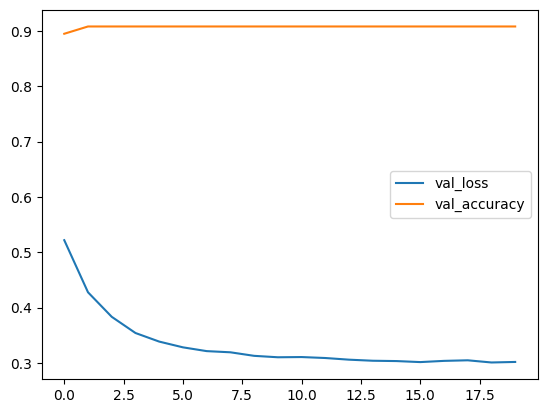

In [58]:
# matplotlib.pyplot 을 활용해서 그래프 그리기

import matplotlib.pyplot as plt

loss = results['val_loss']
accuracy = results['val_accuracy']

plt.plot(loss, label='val_loss')
plt.plot(accuracy, label='val_accuracy')
plt.legend()
plt.show()